https://www.kaggle.com/c/champs-scalar-coupling

## **Prediccion de propiedades moleculares**

### 1. EXPLORACION DE LOS DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [2]:
#DATA:
df=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/train.csv")
df2=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/structures.csv")
df3=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/dipole_moments.csv")
df4=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/magnetic_shielding_tensors.csv")
df5=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/potential_energy.csv")
df6=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/scalar_coupling_contributions.csv")


In [4]:
data=[df,df2,df3,df4,df5,df6]
for i in data:
    print(i.columns)
    print("******************************************************************")

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant'],
      dtype='object')
******************************************************************
Index(['molecule_name', 'atom_index', 'atom', 'x', 'y', 'z'], dtype='object')
******************************************************************
Index(['molecule_name', 'X', 'Y', 'Z'], dtype='object')
******************************************************************
Index(['molecule_name', 'atom_index', 'XX', 'YX', 'ZX', 'XY', 'YY', 'ZY', 'XZ',
       'YZ', 'ZZ'],
      dtype='object')
******************************************************************
Index(['molecule_name', 'potential_energy'], dtype='object')
******************************************************************
Index(['molecule_name', 'atom_index_0', 'atom_index_1', 'type', 'fc', 'sd',
       'pso', 'dso'],
      dtype='object')
******************************************************************


**df y df2**--> Son los dataframes principales, contienen el nombre de la molecula,los indices de cada atomo que forman el par cuya constante de acoplamiento queremos predecir, y el tipo de átomos y sus coordenadas en 3D.

**df3**--> Contiene los momentos dipolares eléctricos moleculares. Estos son vectores tridimensionales que indican la distribución de carga en la molécula.

**df4**--> Contiene los tensores de blindaje magnético para todos los átomos de las moléculas. La primera columna ( molecule_name) contiene el nombre de molécula, la segunda columna ( atom_index) contiene el índice del átomo en la molécula, la tercera a undécima columnas contienen el XX, YX, ZX, XY, YY, ZY, XZ, YZ y ZZ elementos del tensor / matriz, respectivamente.

**df5**--> Contiene la energía potencial de las moléculas.

**df6**--> Contiene las siguientes variables:
- fc--> Contribución de Fermi Contact
- sd--> Contribución dipolar de espín
- pso--> es la contribución de espín-órbita paramagnética
- dso-->contribución de espín-órbita diamagnética.

In [3]:
#Valores nulos:
dataframes=[df,df2,df3,df4,df5,df6]
for dataframe in dataframes:
    print(dataframe.isnull().values.any())

False
False
False
False
False
False


In [4]:
#DF PRINCIPAL (TEST Y TRAIN TIENEN ESTOS DATOS)
print("COLUMNS: ",df.columns)
print("\t")
print("TOTAL ROWS: ",df.shape[0])
print("\t")
print("COUPLE TYPES: ",df["type"].unique())
print("\t")
print("TOTAL NUMBER OF MOLECULES: ",len(df["molecule_name"].unique()))

COLUMNS:  Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant'],
      dtype='object')
	
TOTAL ROWS:  4659076
	
COUPLE TYPES:  ['1JHC' '2JHH' '1JHN' '2JHN' '2JHC' '3JHH' '3JHC' '3JHN']
	
TOTAL NUMBER OF MOLECULES:  85012


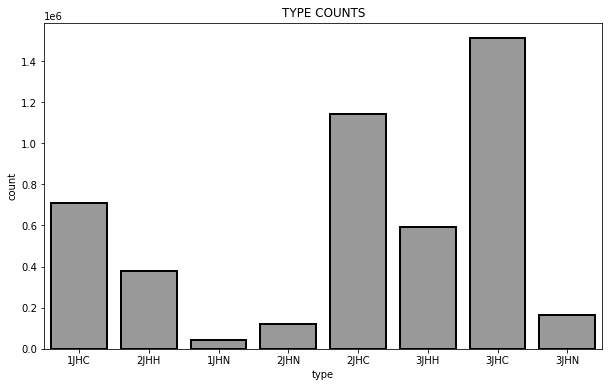

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(df['type'] , facecolor=(0.6, 0.6, 0.6), linewidth=2, edgecolor="black")
plt.title("TYPE COUNTS")
plt.show()

El conjunto de datos posee 8 enlaces unicos, y el tamaño de los datos es diferente para cada uno de ellos.

<IPython.core.display.Javascript object>


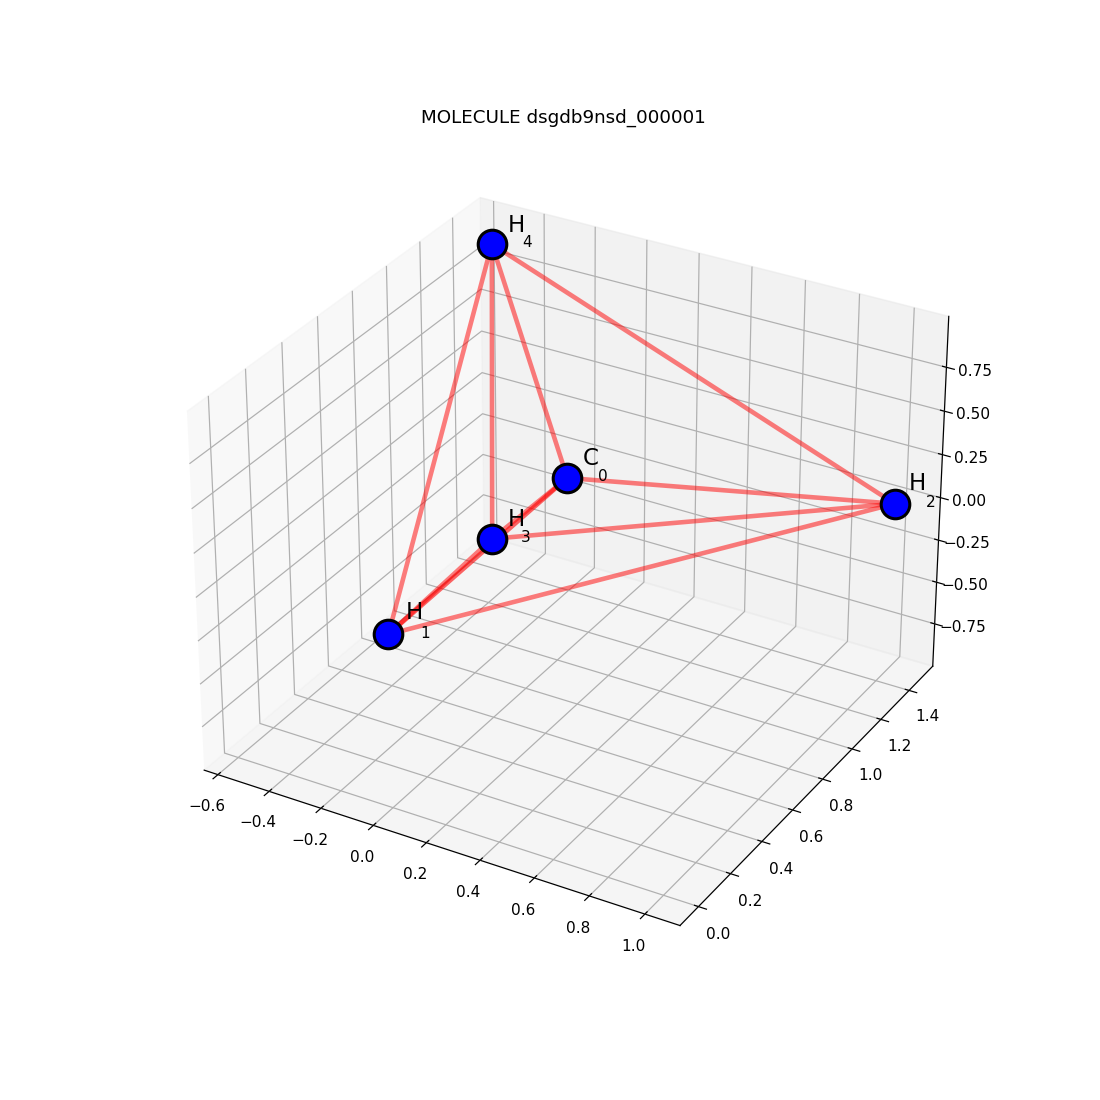

In [6]:
coord=df2[df2["molecule_name"]=="dsgdb9nsd_000001"]
#Para que gire:
#%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# Creamos la figura
fig = plt.figure(figsize=(10,10))
# Creamos el plano 3D
ax = fig.add_subplot(111, projection='3d')

#ax.plot([-0.0126981359,0.002150416],[1.0858041578, -0.0060313176],[0.008000995799999999,0.0019761204],color = 'g',alpha=0.6)
# Agregamos los puntos en el plano 3D
for i in range(len(coord)):
    x=coord["x"][i]
    y=coord["y"][i]
    z=coord["z"][i]
    
    ax.text(x, y+0.1, z,coord["atom"][i], fontsize=15)

    ax.text(x+0.1,y+0.03,z,coord["atom_index"][i])
    
    ax.scatter(x, y, z, c='blue', marker='o',s=350,lw=2,edgecolor="black")
    
    
    
ax.plot([coord["x"][0],coord["x"][1]],[coord["y"][0],coord["y"][1]],[coord["z"][0],coord["z"][1]],color = 'r',lw=3,alpha=0.6)
ax.plot([coord["x"][1],coord["x"][2]],[coord["y"][1],coord["y"][2]],[coord["z"][1],coord["z"][2]],color = 'r',lw=3,alpha=0.5)
ax.plot([coord["x"][1],coord["x"][3]],[coord["y"][1],coord["y"][3]],[coord["z"][1],coord["z"][3]],color = 'r',lw=3,alpha=0.5)
ax.plot([coord["x"][1],coord["x"][4]],[coord["y"][1],coord["y"][4]],[coord["z"][1],coord["z"][4]],color = 'r',lw=3,alpha=0.5)
ax.plot([coord["x"][2],coord["x"][0]],[coord["y"][2],coord["y"][0]],[coord["z"][2],coord["z"][0]],color = 'r',lw=3,alpha=0.5)
ax.plot([coord["x"][2],coord["x"][3]],[coord["y"][2],coord["y"][3]],[coord["z"][2],coord["z"][3]],color = 'r',lw=3,alpha=0.5)
ax.plot([coord["x"][2],coord["x"][4]],[coord["y"][2],coord["y"][4]],[coord["z"][2],coord["z"][4]],color = 'r',lw=3,alpha=0.5)
ax.plot([coord["x"][3],coord["x"][0]],[coord["y"][3],coord["y"][0]],[coord["z"][3],coord["z"][0]],color = 'r',lw=3,alpha=0.5)
ax.plot([coord["x"][3],coord["x"][4]],[coord["y"][3],coord["y"][4]],[coord["z"][3],coord["z"][4]],color = 'r',lw=3,alpha=0.5)
ax.plot([coord["x"][4],coord["x"][0]],[coord["y"][4],coord["y"][0]],[coord["z"][4],coord["z"][0]],color = 'r',lw=3,alpha=0.5)

plt.title("MOLECULE dsgdb9nsd_000001")
plt.show()

Este seria un ejemplo de la primera molecula de estudio "dsgdb9nsd_000001", que esta formada por un atomo de carbono y 4 de hidrogeno,  en la que buscamos predecir la constante de acoplamiento entre cada par de atomos que la forman.

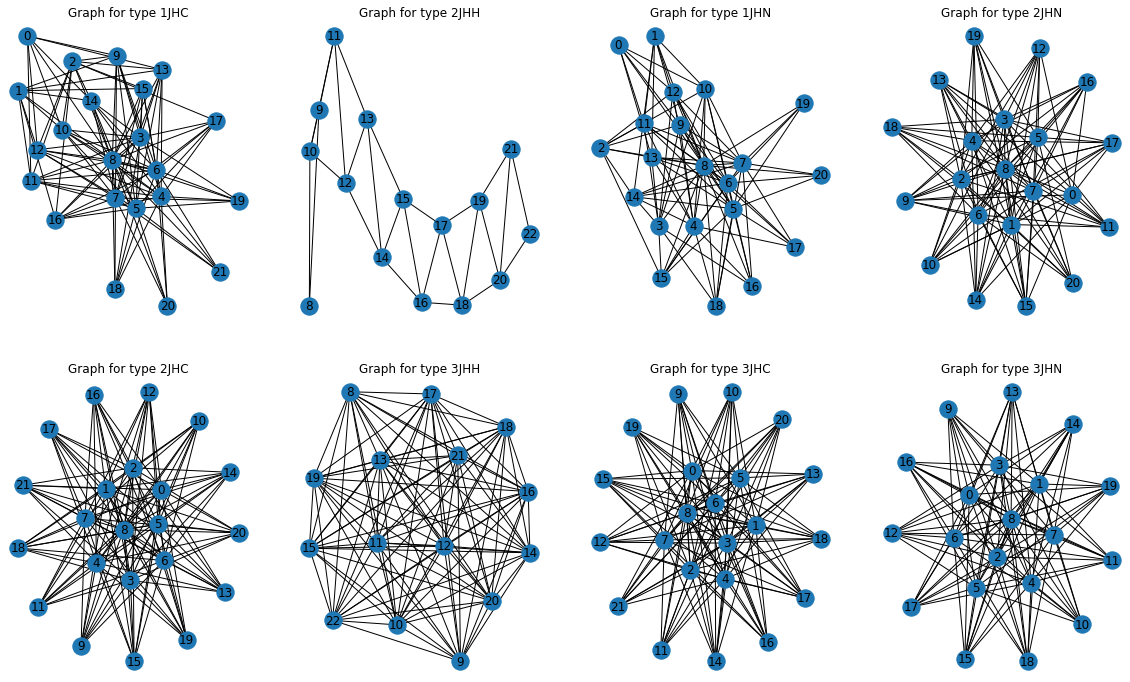

In [9]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(df['type'].unique()):
    train_type = df.loc[df['type'] == t]
    bad_atoms_0 = list(train_type['atom_index_0'].value_counts(normalize=True)[train_type['atom_index_0'].value_counts(normalize=True) < 0.01].index)
    bad_atoms_1 = list(train_type['atom_index_1'].value_counts(normalize=True)[train_type['atom_index_1'].value_counts(normalize=True) < 0.01].index)
    bad_atoms = list(set(bad_atoms_0 + bad_atoms_1))
    train_type = train_type.loc[(train_type['atom_index_0'].isin(bad_atoms_0) == False) & (train_type['atom_index_1'].isin(bad_atoms_1) == False)]
    G = nx.from_pandas_edgelist(train_type, 'atom_index_0', 'atom_index_1', ['scalar_coupling_constant'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

La libreria networkx nos permite visualizar la complejidad de estas interacciones de una manera sorprendente, podemos observar como el par 2JHH es completamente diferente a los demás.

**DISTRIBUCION DE SCALAR COUPLING CONSTANT**

In [10]:
print("MINIMO: ",df["scalar_coupling_constant"].min())
print("MAXIMO: ",df["scalar_coupling_constant"].max())

MINIMO:  -44.7605
MAXIMO:  207.709


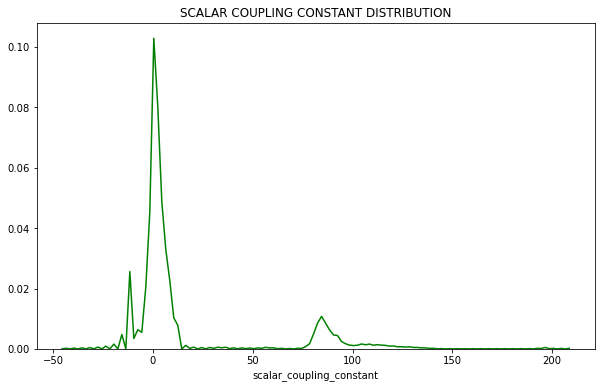

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df["scalar_coupling_constant"], hist=False, color="green")
plt.title("SCALAR COUPLING CONSTANT DISTRIBUTION")
plt.show()

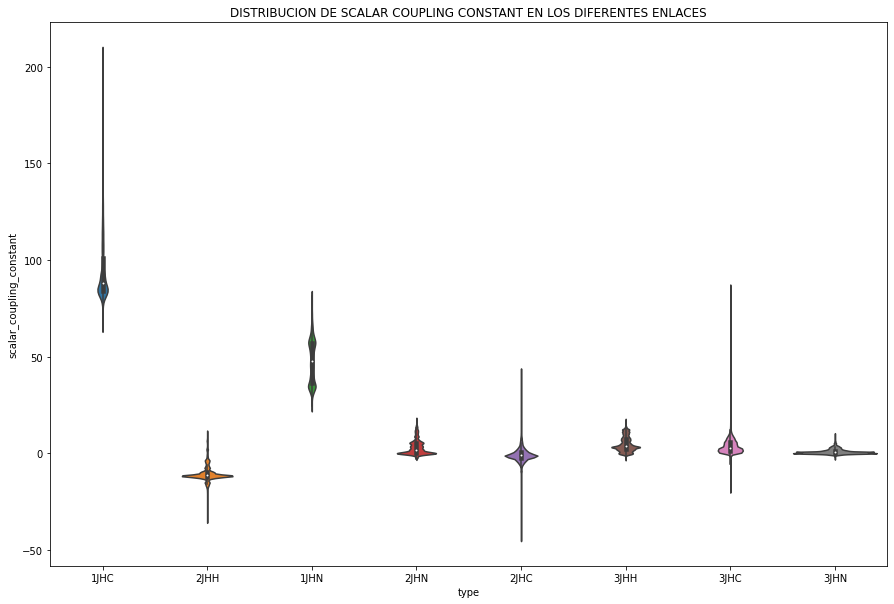

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(df.type ,df.scalar_coupling_constant)
plt.title("DISTRIBUCION DE SCALAR COUPLING CONSTANT EN LOS DIFERENTES ENLACES")
plt.show()

**RELACIONES ENTRE FUERZAS:**

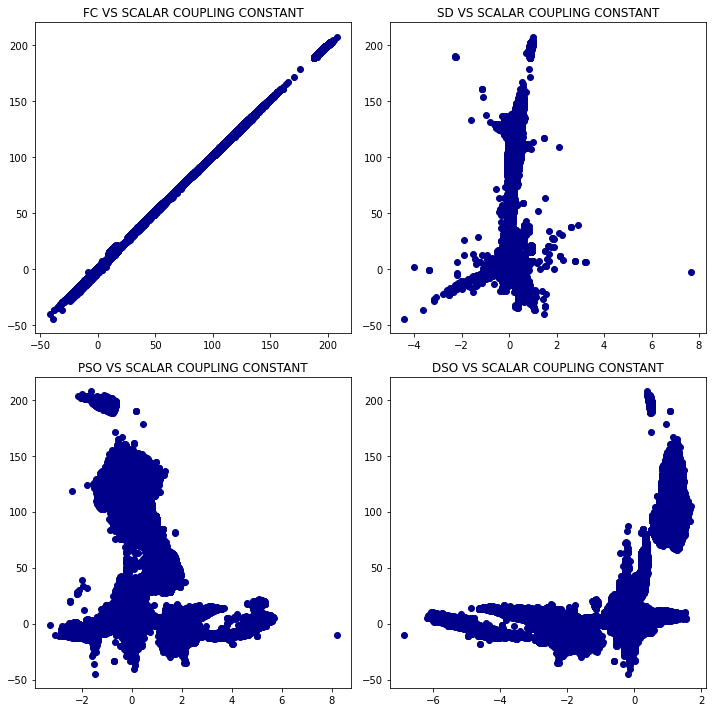

In [11]:
figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

axes[0, 0].scatter(df6.fc,df.scalar_coupling_constant,c="darkblue")
axes[0, 0].set_title('FC VS SCALAR COUPLING CONSTANT')
axes[0, 1].scatter(df6.sd,df.scalar_coupling_constant,c="darkblue")
axes[0, 1].set_title('SD VS SCALAR COUPLING CONSTANT')
axes[1, 0].scatter(df6.pso,df.scalar_coupling_constant,c="darkblue")
axes[1, 0].set_title('PSO VS SCALAR COUPLING CONSTANT')
axes[1, 1].scatter(df6.dso,df.scalar_coupling_constant,c="darkblue")
axes[1, 1].set_title('DSO VS SCALAR COUPLING CONSTANT')

figure.tight_layout()

A simple vista, se observa que la constante de Fermi está extrechamente relacionada con la constante de acoplamiento y que podria ser una variable clave para obtener predicciones muy precisas.

### 2. CALCULOS NECESARIOS Y UNION DE DATOS

**UNION DE LOS DOS DATAFRAMES PRINCIPALES**

In [33]:
df1= df.rename(columns={"atom_index_0":"atom_index"})
df3= pd.merge(left=df1, right=df2, on =["atom_index","molecule_name"])
df3=df3.rename(columns={"atom_index":"atom_index_0"})
df3=df3.rename(columns={"x":"x_0","y":"y_0","z":"z_0","atom":"atom_0"})

df3=df3.rename(columns={"atom_index_1":"atom_index"})
df3= pd.merge(left=df3, right=df2, on =["atom_index","molecule_name"])
df3=df3.rename(columns={"atom_index":"atom_index_1"})
df3=df3.rename(columns={"x":"x_1","y":"y_1","z":"z_1","atom":"atom_1"})


**CALCULO DE DISTANCIAS EUCLIDEANA, MANHATTAN Y CHEVISEV PARA CADA PAR**

In [34]:
def distance(v1, v2):
       return np.sqrt(np.sum((v1 - v2) ** 2))

In [35]:
def manhattan(v1,v2):
    return sum(abs(v1-v2))

In [36]:
def chevisev(v1,v2):
    return(max(abs(v1-v2)))

In [37]:
distancia=[]
for i in range(len(df3)):
    A=np.array([df3["x_0"][i],df3["y_0"][i],df3["z_0"][i]])
    B=np.array([df3["x_1"][i],df3["y_1"][i],df3["z_1"][i]])
    dist=distance(A,B)
    distancia.append(dist)
df3["Distancia Euclidiana"]=distancia

In [38]:
distancia_manhattan=[]
for i in range(len(df3)):
    A=np.array([df3["x_0"][i],df3["y_0"][i],df3["z_0"][i]])
    B=np.array([df3["x_1"][i],df3["y_1"][i],df3["z_1"][i]])
    dist=manhattan(A,B)
    distancia_manhattan.append(dist)
df3["Distancia Manhattan"]=distancia_manhattan

In [39]:
distancia_chevisev=[]
for i in range(len(df3)):
    A=np.array([df3["x_0"][i],df3["y_0"][i],df3["z_0"][i]])
    B=np.array([df3["x_1"][i],df3["y_1"][i],df3["z_1"][i]])
    dist=chevisev(A,B)
    distancia_chevisev.append(dist)
df3["Distancia Chevisev"]=distancia_chevisev

**UNION CON TENSORES DE BLINDAJE MAGNETICO**

In [40]:
df3= df3.rename(columns={"atom_index_0":"atom_index"})
df3= pd.merge(left=df3, right=df4, on =["atom_index","molecule_name"])
df3=df3.rename(columns={"atom_index":"atom_index_0"})
df3=df3.rename(columns={"XX":"XX_0","YX":"YX_0","ZX":"ZX_0","XY":"XY_0","YY":"YY_0","ZY":"ZY_0","XZ":"XZ_0","YZ":"YZ_0","ZZ":"ZZ_0"})

df3=df3.rename(columns={"atom_index_1":"atom_index"})
df3= pd.merge(left=df3, right=df4, on =["atom_index","molecule_name"])
df3=df3.rename(columns={"atom_index":"atom_index_1"})
df3=df3.rename(columns={"XX":"XX_1","YX":"YX_1","ZX":"ZX_1","XY":"XY_1","YY":"YY_1","ZY":"ZY_1","XZ":"XZ_1","YZ":"YZ_1","ZZ":"ZZ_1"})

**CALCULO DEL PRODUCTO PUNTO ENTRE LAS MATRICES DE BLINDAJE DE CADA ATOMO**

In [ ]:
prod_punto=[]
for i in range(len(df3)):
    prod=np.dot(df3.iloc[i][17:26],df3.iloc[i][26:])
    prod_punto.append(prod)
df3["Producto Punto"]=prod_punto

In [ ]:
df3.to_csv("c.scalar_df3.csv")

In [46]:
df3=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/c.scalar_df3.csv")

**UNION CON DATAFRAME DE FUERZAS ADICIONALES**

In [48]:
df1= df3[["molecule_name","atom_0","atom_1",'atom_index_0', 'atom_index_1','type','Distancia Euclidiana',
       'Distancia Manhattan', 'Distancia Chevisev','Producto Punto','scalar_coupling_constant']]
df1= pd.merge(left=df1, right=df6, on =["molecule_name","atom_index_0",'atom_index_1', 'type'])
#del df1["fc"]
df1= pd.merge(left=df1, right=df5, on =["molecule_name"])

df1.head()

,molecule_name,atom_0,atom_1,atom_index_0,atom_index_1,type,Distancia Euclidiana,Distancia Manhattan,Distancia Chevisev,Producto Punto,scalar_coupling_constant,fc,sd,pso,dso,potential_energy
0,dsgdb9nsd_000001,H,C,1,0,1JHC,1.091953,1.112709,1.091835,18434.274686,84.8076,83.0224,0.254579,1.25862,0.272010,-40.52368
1,dsgdb9nsd_000001,H,C,2,0,1JHC,1.091952,1.410100,1.024429,18434.275947,84.8074,83.0222,0.254585,1.25861,0.272013,-40.52368
2,dsgdb9nsd_000001,H,C,3,0,1JHC,1.091946,1.774484,0.884645,18434.319686,84.8093,83.0241,0.254634,1.25856,0.272012,-40.52368
3,dsgdb9nsd_000001,H,C,4,0,1JHC,1.091948,1.761640,0.898396,18434.300834,84.8095,83.0243,0.254628,1.25856,0.272012,-40.52368
4,dsgdb9nsd_000001,H,H,1,2,2JHH,1.783120,2.481062,1.469782,2950.968090,-11.2570,-11.0347,0.352978,2.85839,-3.433600,-40.52368


**DIVISION DE DATOS CATEGORICOS Y NUMERICOS Y NORMALIZACION**

In [5]:
df1_cat=df1[["atom_0","atom_1"]]

In [6]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df1_cat2=df1_cat.apply(le.fit_transform)
df1_cat2.head()

,atom_0,atom_1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [7]:
df1_num=df1[['Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto', 'scalar_coupling_constant',
       'sd', 'pso', 'dso', 'potential_energy']]

In [8]:
#Normalizo los df_num
from sklearn.preprocessing import MinMaxScaler
df_num2 = MinMaxScaler().fit_transform(df1_num)
df_num2 = pd.DataFrame(df_num2, columns = df1_num.columns)
df_num2.head()

,Distancia Euclidiana,Distancia Manhattan,Distancia Chevisev,Producto Punto,scalar_coupling_constant,sd,pso,dso,potential_energy
0,0.030797,0.018075,0.153766,0.910495,0.513203,0.386606,0.395724,0.832959,1.0
1,0.030796,0.070290,0.133118,0.910495,0.513202,0.386606,0.395723,0.832960,1.0
2,0.030795,0.134269,0.090299,0.910495,0.513210,0.386610,0.395719,0.832960,1.0
3,0.030795,0.132014,0.094512,0.910495,0.513211,0.386610,0.395719,0.832960,1.0
4,0.268064,0.258330,0.269539,0.734909,0.132703,0.394743,0.534960,0.399980,1.0


In [9]:
df10=pd.concat([df1_cat2,df_num2,df1["type"]],axis=1)
df10.head()

,atom_0,atom_1,Distancia Euclidiana,Distancia Manhattan,Distancia Chevisev,Producto Punto,scalar_coupling_constant,sd,pso,dso,potential_energy,type
0,0,0,0.030797,0.018075,0.153766,0.910495,0.513203,0.386606,0.395724,0.832959,1.0,1JHC
1,0,0,0.030796,0.070290,0.133118,0.910495,0.513202,0.386606,0.395723,0.832960,1.0,1JHC
2,0,0,0.030795,0.134269,0.090299,0.910495,0.513210,0.386610,0.395719,0.832960,1.0,1JHC
3,0,0,0.030795,0.132014,0.094512,0.910495,0.513211,0.386610,0.395719,0.832960,1.0,1JHC
4,0,1,0.268064,0.258330,0.269539,0.734909,0.132703,0.394743,0.534960,0.399980,1.0,2JHH


In [10]:
df10.to_csv("c.scalar_df10.csv")

In [3]:
df10=pd.read_csv("/Users/rociocuestapedraz/Desktop/champs-scalar-coupling/c.scalar_df10.csv")

In [4]:
X = np.asanyarray(df10[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df10[[ 'scalar_coupling_constant']])

### 3. BUSQUEDA DE LOS MEJORES MODELOS DE REGRESION PARA CADA ENLACE

**NOTA:**  No se incluye la contribucion de Fermi en este analisis

Los algoritmos de prueba que fueron aplicados a cada enlace son los sigiuentes:
- **Regresion multilineal simple.**
- **Regresiones multilineales polinomicas de grado 2 y 3.**
- **Regresiones multivariable no lineales (cuadratica, cubica y exponencial).**
- **Perceptron Regressor.**
- **Random Forest Regressor.**

**CREACION DE FUNCIONES NECESARIAS PARA LAS REGRESIONES**

In [5]:
#Feature Importance
def feature_importance(X,y):
    from sklearn.tree import DecisionTreeRegressor
    # Build a forest and compute the feature importances
    forest = DecisionTreeRegressor()
    forest.fit(X, y)
    importances = forest.feature_importances_

    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],color="r", align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [4]:
def kfold_split_Random(X,y):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5)
    R2=[]
    MSE=[]
    for train_index, test_index in kf.split(X):
    
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        r2,mse=Random_forest_Regressor(Xtrain,ytrain,Xtest,ytest)
        R2.append(r2)
        MSE.append(mse)
    R2=np.array(R2)
    MSE=np.array(MSE)
    print('R squared score: ', R2.mean())
    print("RMSE: ", MSE.mean())  
    

In [5]:
def kfold_split_Perceptron(X,y):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5)
    R2=[]
    MSE=[]
    for train_index, test_index in kf.split(X):
    
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        r2,mse=perceptron_regressor(Xtrain,ytrain,Xtest,ytest)
        R2.append(r2)
        MSE.append(mse)
        
    R2=np.array(R2)
    MSE=np.array(MSE)
    print('R squared score: ', R2.mean())
    print("RMSE: ", MSE.mean())  

In [6]:
#Calculo X_train, X_test, y_train, y_test con k-Fold:

def kfold_split2(X,y):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5)
    y_test=[]
    X_test=[]
    X_train=[]
    y_train=[]
    for train_index, test_index in kf.split(X):
    
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        y_test.extend(ytest)
        X_test.extend(Xtest)
        X_train.extend(Xtrain)
        y_train.extend(ytrain)
    X_train=np.array(X_train)
    y_train=np.array(y_train)
    X_test=np.array(X_test)
    y_test=np.array(y_test)
    return X_train, y_train,X_test,y_test

#X_train=kfold_split(X,y)[0]
#y_train=kfold_split(X,y)[1]
#X_test=kfold_split(X,y)[2]
#y_test=kfold_split(X,y)[3]

In [7]:
def multilineal_simple(X_train, X_test, y_train, y_test):
    regresion_lineal = linear_model.LinearRegression()
    regresion_lineal.fit(X_train, y_train)
    yhat = regresion_lineal.predict(X_test)
    Rsquared=regresion_lineal.score(X_test, y_test)
    RMSE=sqrt(mean_squared_error(yhat,y_test))
    print('R squared score: ', Rsquared)
    print("RMSE: ", RMSE)  

In [8]:
def multilineal_poly(X_train, X_test, y_train, y_test):
    from sklearn.preprocessing import PolynomialFeatures
    for i in range(2,4):
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train)
        regresion_poly = linear_model.LinearRegression()
        regresion_poly.fit(X_train_poly, y_train)
        X_test_poly = poly.fit_transform(X_test)
        yhat = regresion_poly.predict(X_test_poly)
        print("GRADO",i)
        print("R2_Score", r2_score(y_test,yhat))
        print("mean_squared_error: ", mean_squared_error(yhat,y_test))
        print("*******************************************************")

In [9]:
def exponencial(X_train):
    y = np.exp(X_train)
    return y

def cuadratica(X_train):
    y = (X_train**2)
    return y

def cubica(X_train):
    y = 1*(X_train**3) + 1*(X_train**2) + 1*X_train + 3
    return y

def no_lineales(X_train,X_test,y_train,y_test):
    funciones=[exponencial,cuadratica,cubica]
    nombres=['exponencial','cuadratica','cubica']
    for i,j in zip (funciones,nombres):
        X_train_exponencial = i(X_train)
        regresion_exponencial = linear_model.LinearRegression()
        regresion_exponencial.fit(X_train_exponencial, y_train)
        X_test_exponencial = i(X_test)
        yhat = regresion_exponencial.predict(X_test_exponencial)
        print("Regresion: ",j)
        print("r2_score",r2_score(y_test,yhat))
        print("mean_squared_error",mean_squared_error(yhat,y_test))
        print("********************************************************")

In [10]:
def Random_forest_Regressor(X_train,y_train,X_test,y_test):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.datasets import make_regression
    regr = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regr.fit(X_train, y_train)
    yhat = regr.predict(X_test)
    return r2_score(y_test,yhat),mean_squared_error(yhat,y_test)


In [11]:
def perceptron_regressor(X_train, y_train,X_test,y_test):
    from sklearn.neural_network import MLPRegressor
    regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
    y_hat=regr.predict(X_test)
    return r2_score(y_test,y_hat),mean_squared_error(y_hat,y_test)

In [12]:
#Importar librerias para Regresion
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

### 1JHC

In [15]:
df_a=df10[df10["type"]=="1JHC"]
df_a.reset_index(drop=True,inplace=True)

In [16]:
X = np.asanyarray(df_a[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_a[[ 'scalar_coupling_constant']])

In [102]:
#HOLD OUT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [22]:
#MULTILINEAL SIMPLE/HOLD OUT
multilineal_simple(X_train, X_test, y_train, y_test)

R squared score:  0.8436775491940487
RMSE:  0.02859300332091641


In [23]:
#POLIMULTI/HOLD OUT
multilineal_poly(X_train, X_test, y_train, y_test)

GRADO 2
R2_Score 0.9151301826421085
mean_squared_error:  0.00044386557304916535
*******************************************************
GRADO 3
R2_Score 0.8299986704072836
mean_squared_error:  0.0008890997992913056
*******************************************************


In [24]:
#NO LINEAL/HOLD OUT
no_lineales(X_train,X_test,y_train,y_test)

Regresion:  exponencial
r2_score 0.8442703509198837
mean_squared_error 0.0008144595108317847
********************************************************
Regresion:  cuadratica
r2_score 0.8399026055089933
mean_squared_error 0.0008373026355148788
********************************************************
Regresion:  cubica
r2_score 0.845104048191088
mean_squared_error 0.000810099309189402
********************************************************


In [17]:
#RANDOM REGRESSOR/KFOLD
kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

R squared score:  0.9733264044810698
RMSE:  0.00013614036268331422


In [18]:
#PERCEPTRON/KFOLD
kfold_split_Perceptron(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was e

R squared score:  0.9192354912251279
RMSE:  0.00040578554669467036


### 2JHH

In [121]:
df_b=df10[df10["type"]=='2JHH']
del df_b["type"]
df_b.reset_index(drop=True,inplace=True)

In [122]:
X = np.asanyarray(df_b[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_b[[ 'scalar_coupling_constant']])

In [30]:
#HOLD OUT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [31]:
#MULTILINEAL SIMPLE/HOLD OUT
multilineal_simple(X_train, X_test, y_train, y_test)

R squared score:  0.7009733524852285
RMSE:  0.00862414384546425


In [32]:
#POLIMULTI /HOLD OUT
multilineal_poly(X_train, X_test, y_train, y_test)

GRADO 2
R2_Score 0.8872751964608988
mean_squared_error:  2.8037647967627623e-05
*******************************************************
GRADO 3
R2_Score 0.9079766446106552
mean_squared_error:  2.288864883504866e-05
*******************************************************


In [33]:
#NO LINEAL/HOLD OUT
no_lineales(X_train,X_test,y_train,y_test)

Regresion:  exponencial
r2_score 0.7923572810580172
mean_squared_error 5.1646250638324934e-05
********************************************************
Regresion:  cuadratica
r2_score 0.8172412093805947
mean_squared_error 4.5456957772375515e-05
********************************************************
Regresion:  cubica
r2_score 0.8132923347976058
mean_squared_error 4.643914760061286e-05
********************************************************


In [136]:
#RANDOM FOREST/KFOLD
kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

R squared score:  0.9479250938490852
RMSE:  1.2534344823163706e-05


(0.9479250938490852, 1.2534344823163706e-05)

In [137]:
#PERCEPTRON/KFOLD
kfold_split_Perceptron(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was e

R squared score:  0.798162693527086
RMSE:  4.7380928923136515e-05


(0.798162693527086, 4.7380928923136515e-05)

### 1JHN

In [140]:
df_c=df10[df10["type"]=='1JHN']
df_b=df10[df10["type"]=='2JHH']
del df_c["type"]
df_c.reset_index(drop=True,inplace=True)

In [141]:
X = np.asanyarray(df_c[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_c[[ 'scalar_coupling_constant']])

In [39]:
#HOLD OUT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [40]:
#MULTILINEAL SIMPLE/HOLD OUT
multilineal_simple(X_train, X_test, y_train, y_test)

R squared score:  0.8622990765698406
RMSE:  0.01598614761493818


In [41]:
#POLIMULTI/HOLD OUT
multilineal_poly(X_train, X_test, y_train, y_test)

GRADO 2
R2_Score 0.9360312492580107
mean_squared_error:  0.00011871856938245152
*******************************************************
GRADO 3
R2_Score 0.9423491257988839
mean_squared_error:  0.00010699332454387963
*******************************************************


In [42]:
#NO LINEAL/HOLD OUT
no_lineales(X_train,X_test,y_train,y_test)

Regresion:  exponencial
r2_score 0.8616369439766328
mean_squared_error 0.00025678575673193345
********************************************************
Regresion:  cuadratica
r2_score 0.812096981004035
mean_squared_error 0.0003487261723746907
********************************************************
Regresion:  cubica
r2_score 0.8606844364312894
mean_squared_error 0.00025855350007219753
********************************************************


In [142]:
#RANDOM REGRESSOR/KFOLD
kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

R squared score:  0.9764822054926354
RMSE:  4.0213187642498256e-05


In [143]:
#PERCEPTRON REGRESSOR/K FOLD
kfold_split_Perceptron(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was e

R squared score:  0.8057716134394657
RMSE:  0.00035161467522009017


### 2JHN

In [144]:
df_d=df10[df10["type"]=='2JHN']

In [145]:
X = np.asanyarray(df_d[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_d[[ 'scalar_coupling_constant']])

In [45]:
#HOLD OUT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [46]:
#MULTILINEAL SIMPLE/HOLD OUT
multilineal_simple(X_train, X_test, y_train, y_test)

R squared score:  0.3703099639575025
RMSE:  0.011512628571161657


In [47]:
#POLIMULTI HOLD OUT
multilineal_poly(X_train, X_test, y_train, y_test)

GRADO 2
R2_Score 0.5587945610691836
mean_squared_error:  9.286734358768024e-05
*******************************************************
GRADO 3
R2_Score -8.765813229036022
mean_squared_error:  0.002055561995681137
*******************************************************


In [48]:
#NO LINEAL/HOLD OUT
no_lineales(X_train,X_test,y_train,y_test)

Regresion:  exponencial
r2_score 0.3696875204517057
mean_squared_error 0.00013267163194466606
********************************************************
Regresion:  cuadratica
r2_score 0.36667346552148805
mean_squared_error 0.00013330604677752708
********************************************************
Regresion:  cubica
r2_score 0.36855184040755984
mean_squared_error 0.0001329106761167437
********************************************************


In [146]:
#RANDOM REGRESSOR/KFOLD
kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

R squared score:  0.9062009775831363
RMSE:  1.9660042453727357e-05


In [147]:
#PERCEPTRON REGRESSOR/K FOLD
kfold_split_Perceptron(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was e

R squared score:  0.1358447575296869
RMSE:  0.00016613851796441943


### 2JHC

In [148]:
df_e=df10[df10["type"]=='2JHC']

In [149]:
X = np.asanyarray(df_e[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_e[[ 'scalar_coupling_constant']])

In [51]:
#HOLD OUT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [52]:
#MULTILINEAL SIMPLE/HOLD OUT
multilineal_simple(X_train, X_test, y_train, y_test)

R squared score:  0.2332664291386336
RMSE:  0.01557320300431735


In [53]:
#POLIMULTI/HOLD OUT
multilineal_poly(X_train, X_test, y_train, y_test)

GRADO 2
R2_Score 0.436187253588326
mean_squared_error:  0.00017833898919802097
*******************************************************
GRADO 3
R2_Score 0.5122945227120377
mean_squared_error:  0.0001542655826769238
*******************************************************


In [54]:
#NO LINEAL/HOLD OUT
no_lineales(X_train,X_test,y_train,y_test)

Regresion:  exponencial
r2_score 0.24034451840610271
mean_squared_error 0.00024028578918872484
********************************************************
Regresion:  cuadratica
r2_score 0.2519952040843112
mean_squared_error 0.00023660057362639614
********************************************************
Regresion:  cubica
r2_score 0.24802170557042935
mean_squared_error 0.00023785742656747553
********************************************************


In [150]:
#RANDOM REGRESSOR/KFOLD
kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

R squared score:  0.8618842241275994
RMSE:  4.406673160059969e-05


In [151]:
#PERCETRON REGRESSOR/KFOLD
kfold_split_Perceptron(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was e

R squared score:  0.519390977329728
RMSE:  0.00015220061864608058


### 3JHH

In [152]:
df_f=df10[df10["type"]=='3JHH']

In [153]:
X = np.asanyarray(df_f[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_f[[ 'scalar_coupling_constant']])

In [57]:
#HOLD OUT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [58]:
#MULTILINEAL SIMPLE/HOLD OUT
multilineal_simple(X_train, X_test, y_train, y_test)

R squared score:  0.70687543584609
RMSE:  0.007938212931288727


In [59]:
#POLIMULTI/HOLD OUT
multilineal_poly(X_train, X_test, y_train, y_test)

GRADO 2
R2_Score 0.8615213486763436
mean_squared_error:  2.976981247780406e-05
*******************************************************
GRADO 3
R2_Score 0.8894729405350101
mean_squared_error:  2.3760845462781795e-05
*******************************************************


In [60]:
#NO LINEAL/HOLD OUT
no_lineales(X_train,X_test,y_train,y_test)

Regresion:  exponencial
r2_score 0.4819077689453318
mean_squared_error 0.00011137824074164556
********************************************************
Regresion:  cuadratica
r2_score 0.48334418709131566
mean_squared_error 0.00011106944297074795
********************************************************
Regresion:  cubica
r2_score 0.47498832934234847
mean_squared_error 0.00011286576547894863
********************************************************


In [154]:
#RANDOM REGRESSOR/KFOLD
kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

R squared score:  0.9612982188398433
RMSE:  7.914501891039481e-06


In [155]:
#PERCEPTRON REGRESSOR/K FOLD
kfold_split_Perceptron(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was e

R squared score:  0.6665678947385496
RMSE:  6.869409591912033e-05


### 3JHC

In [156]:
df_g=df10[df10["type"]=='3JHC']

In [157]:
X = np.asanyarray(df_g[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_g[[ 'scalar_coupling_constant']])

In [63]:
#HOLD OUT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [64]:
#MULTILINEAL SIMPLE/HOLD OUT
multilineal_simple(X_train, X_test, y_train, y_test)

R squared score:  0.2190594337273798
RMSE:  0.01075262820920333


In [65]:
#POLIMULTI/HOLD OUT
multilineal_poly(X_train, X_test, y_train, y_test)

GRADO 2
R2_Score 0.3920802223312182
mean_squared_error:  9.000311670213682e-05
*******************************************************
GRADO 3
R2_Score 0.4341244696263886
mean_squared_error:  8.37784248349437e-05
*******************************************************


In [66]:
#NO LINEAL/HOLD OUT
no_lineales(X_train,X_test,y_train,y_test)

Regresion:  exponencial
r2_score 0.2121636437024581
mean_squared_error 0.00011663994185210926
********************************************************
Regresion:  cuadratica
r2_score 0.2088323745501055
mean_squared_error 0.00011713313950301507
********************************************************
Regresion:  cubica
r2_score 0.20842029399468132
mean_squared_error 0.00011719414843163184
********************************************************


In [158]:
#RANDOM REGRESSOR/KFOLD
kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

R squared score:  0.7600553454609219
RMSE:  3.557159780166452e-05


In [159]:
#PERCEPTRON REGRESSOR/K FOLD
kfold_split_Perceptron(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was e

R squared score:  0.40871593210994756
RMSE:  8.769099627751654e-05


## 3JHN

In [26]:
df_h=df10[df10["type"]=='3JHN']

In [27]:
X = np.asanyarray(df_h[['atom_0', 'atom_1', 'Distancia Euclidiana', 'Distancia Manhattan',
       'Distancia Chevisev', 'Producto Punto','sd', 'pso', 'dso', 'potential_energy']])
y = np.asanyarray(df_h[[ 'scalar_coupling_constant']])

In [25]:
#HOLD OUT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [70]:
#MULTILINEAL SIMPLE/HOLD OUT
multilineal_simple(X_train, X_test, y_train, y_test)

R squared score:  0.15421427128674414
RMSE:  0.004805656501040636


In [71]:
#POLIMULTI/ HOLD OUT
multilineal_poly(X_train, X_test, y_train, y_test)

GRADO 2
R2_Score 0.2928118683784252
mean_squared_error:  1.9309901604116382e-05
*******************************************************
GRADO 3
R2_Score 0.4002662468243853
mean_squared_error:  1.6375840097788252e-05
*******************************************************


In [72]:
#NO LINEAL/HOLD OUT
no_lineales(X_train,X_test,y_train,y_test)

Regresion:  exponencial
r2_score 0.15388465497930737
mean_squared_error 2.310333463970722e-05
********************************************************
Regresion:  cuadratica
r2_score 0.15341223246555624
mean_squared_error 2.3116234223068702e-05
********************************************************
Regresion:  cubica
r2_score 0.15368384410331049
mean_squared_error 2.3108817817497045e-05
********************************************************


In [28]:
#RANDOM REGRESSOR/KFOLD
kfold_split_Random(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

R squared score:  0.7986460755140495
RMSE:  5.334239692408817e-06


In [29]:
#PERCEPTRON 
kfold_split_Perceptron(X,y)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was e

R squared score:  0.011688881233867332
RMSE:  2.685125862774e-05


### RESULTADOS

In [20]:
index = pd.MultiIndex.from_product([['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN'], 
                                       ['R2 SCORE', 'RMSE']], 
                                      names=['ENLACE', 'RESULTADO'])

RES = pd.DataFrame(index=index,  columns=["RLM SIMPLE","RLM POLI 2DEGREE","RLM POLI 3DEGREE","RLM EXPONENCIAL","RLM CUADRATICA","RLM CUBICA","RANDOM FOREST","PERCEPTRON"])

In [30]:
RES['RLM SIMPLE']=[0.8437,0.0286,0.7009,0.0086,0.8623,0.0159,0.3703,0.0115,0.2332,0.0156,0.7068,0.0079,0.2191,0.0108,0.1542,0.0048]
RES['RLM POLI 2DEGREE']=[0.9151,0.0004,0.8872,2.80e-05,0.9360,0.0001,0.5587,9.2867,0.4361,0.0001,0.8615,2.97e-05,0.3921,0.4341,0.2928,0.4003]
RES['RLM POLI 3DEGREE']=[0.8299,0.0008,0.9079,2.80e-05,0.9423,0.0001,-8.7658,0.021,0.5123,0.0001,0.8894,2.37e-05,0.4341,8.37e-05,0.4002,1.63e-05]
RES['RLM EXPONENCIAL']=[0.8442,0.0008,0.7923,5.16e-05,0.8616,0.0002,0.3697,0.0001,0.2403,0.0002,0.4819,0.0001,0.2122,0.0001,0.1539,2.31e-05]
RES['RLM CUADRATICA']=[0.8399,0.0008,0.8172,4.54e-05,0.8121,0.0003,0.3667,0.0001,0.2519,0.0002,0.4833,0.0001,0.2088,0.0001,0.1534,2.31e-05]
RES['RLM CUBICA']=[0.8451,0.0008,0.8133,4.64e-05,0.8607,0.0002,0.3687,0.0001,0.2480,0.0002,0.4750,0.0001,0.2084,0.0001,0.1568,2.31e-05]
RES['RANDOM FOREST']=[0.9733,0.0001,0.9479,1.25e-05,0.9775,4.02e-05,0.9062,1.96e-05,0.8619,4.41e-05,0.9613,7.91e-06,0.7601,3.55e-05,0.7986,5.33e-05]
RES['PERCEPTRON']=[0.9192,0.0004,0.7981,4.73e-05,0.8058,0.0004,0.1358,0.0001,0.5194,0.0001,0.6657,6.87e-05,0.4087,8.76e-05,0.0116,2.68e-05]

In [31]:
RES

RLM SIMPLE  RLM POLI 2DEGREE  RLM POLI 3DEGREE  \
ENLACE RESULTADO                                                   
1JHC   R2 SCORE       0.8437          0.915100          0.829900   
       RMSE           0.0286          0.000400          0.000800   
2JHH   R2 SCORE       0.7009          0.887200          0.907900   
       RMSE           0.0086          0.000028          0.000028   
1JHN   R2 SCORE       0.8623          0.936000          0.942300   
       RMSE           0.0159          0.000100          0.000100   
2JHN   R2 SCORE       0.3703          0.558700         -8.765800   
       RMSE           0.0115          9.286700          0.021000   
2JHC   R2 SCORE       0.2332          0.436100          0.512300   
       RMSE           0.0156          0.000100          0.000100   
3JHH   R2 SCORE       0.7068          0.861500          0.889400   
       RMSE           0.0079          0.000030          0.000024   
3JHC   R2 SCORE       0.2191          0.392100          0.434100   
       RMSE           0.0108          0.434100          0.000084   
3JHN   R2 SCORE       0.1542          0.292800          0.400200   
       RMSE           0.0048          0.400300          0.000016   

                  RLM EXPONENCIAL  RLM CUADRATICA  RLM CUBICA  RANDOM FOREST  \
ENLACE RESULTADO                                                               
1JHC   R2 SCORE          0.844200        0.839900    0.845100       0.973300   
       RMSE              0.000800        0.000800    0.000800       0.000100   
2JHH   R2 SCORE          0.792300        0.817200    0.813300       0.947900   
       RMSE              0.000052        0.000045    0.000046       0.000013   
1JHN   R2 SCORE          0.861600        0.812100    0.860700       0.977500   
       RMSE              0.000200        0.000300    0.000200       0.000040   
2JHN   R2 SCORE          0.369700        0.366700    0.368700       0.906200   
       RMSE              0.000100        0.000100    0.000100       0.000020   
2JHC   R2 SCORE          0.240300        0.251900    0.248000       0.861900   
       RMSE              0.000200        0.000200    0.000200       0.000044   
3JHH   R2 SCORE          0.481900        0.483300    0.475000       0.961300   
       RMSE              0.000100        0.000100    0.000100       0.000008   
3JHC   R2 SCORE          0.212200        0.208800    0.208400       0.760100   
       RMSE              0.000100        0.000100    0.000100       0.000036   
3JHN   R2 SCORE          0.153900        0.153400    0.156800       0.798600   
       RMSE              0.000023        0.000023    0.000023       0.000053   

                  PERCEPTRON  
ENLACE RESULTADO              
1JHC   R2 SCORE     0.919200  
       RMSE         0.000400  
2JHH   R2 SCORE     0.798100  
       RMSE         0.000047  
1JHN   R2 SCORE     0.805800  
       RMSE         0.000400  
2JHN   R2 SCORE     0.135800  
       RMSE         0.000100  
2JHC   R2 SCORE     0.519400  
       RMSE         0.000100  
3JHH   R2 SCORE     0.665700  
       RMSE         0.000069  
3JHC   R2 SCORE     0.408700  
       RMSE         0.000088  
3JHN   R2 SCORE     0.011600  
       RMSE         0.000027

En todos los enlaces, Random Forest Regressor es lo modelo de regression mas eficaz, tanto en el score mayor con el el menor mean error squared.
En la siguiente etapa de estudio, empleare deep learning con keras y hare una compartiva con random forest regressor con la red neuronal.